# Assignment 1
## Deep Learning Technologies
### Shruti Badrinarayanan - 016768141

## Step 1
Import the data from the given .csv file (diabetes.csv). The first few columns contain the data while the last column is a binary class label of 0 or 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/Deep Learning/Assignments/Assignment 1/diabetes.csv', header=None)

# Display the DataFrame
data

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
...,...,...,...,...,...,...,...,...,...
754,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000,1
755,-0.764706,0.226131,0.147541,-0.454545,0.000000,0.096870,-0.776260,-0.800000,1
756,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000,1
757,-0.882353,0.266332,-0.016393,0.000000,0.000000,-0.102832,-0.768574,-0.133333,0


## Step 2
Preprocess the data as you see fit and show basic data visualization for better understanding of data.

In [3]:
data.describe()

,0,1,2,3,4,5,6,7,8
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,-0.407657,0.218563,0.176505,-0.289735,-0.323534,-0.032245,-0.663253,-0.516162,0.653491
std,0.386260,0.306419,0.201287,0.258480,0.375544,0.205376,0.283056,0.400794,0.476171
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.178837,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.747225,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.531597,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Check for missing values
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

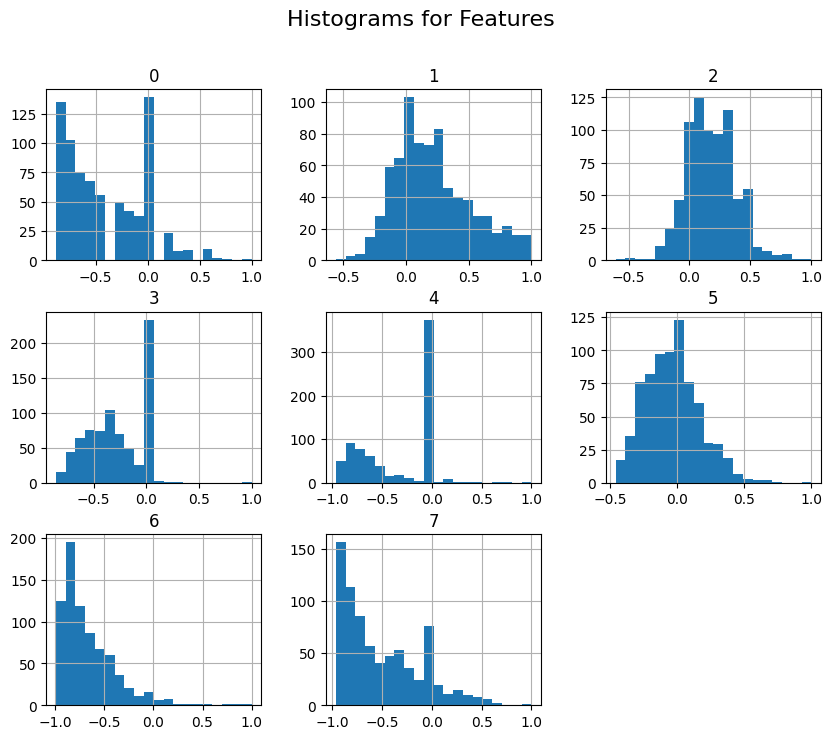

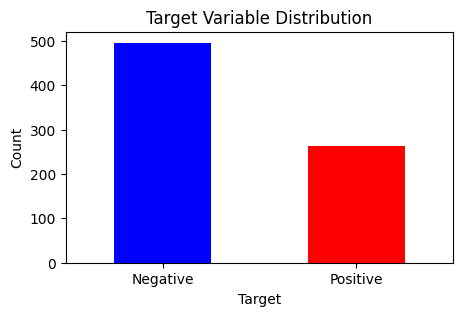

In [7]:
import matplotlib.pyplot as plt

# Histograms for each feature
data.iloc[:, :-1].hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograms for Features', fontsize=16)
plt.show()

# Bar plot for the target variable
plt.figure(figsize=(5, 3))
data.iloc[:, -1].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Target Variable Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.show()

## Step 3
Split into 80% train 20% test

In [8]:
from sklearn.model_selection import train_test_split

inputs = data.iloc[:, :-1]
outputs = data.iloc[:, -1]

# Split data - Train (80%), Test (20%)
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Tensorflow

## Step 4
Modify the model shown in the demo to take the new data

In [9]:
# Create a Deep Model
import tensorflow as tf

# Modified model, taking in 8 inputs, resulting in a 1 output
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='sigmoid',input_shape=[8,]),
    tf.keras.layers.Dense(16,activation='sigmoid'),
    tf.keras.layers.Dense(1)
])

# Get Loss from library
loss = tf.keras.losses.MeanSquaredError()

# Compile the model with an optimizer
model.compile(optimizer='SGD',
              loss=loss,
              metrics=['mean_squared_error'])

## Step 5
Train the model on the data

In [10]:
# Train model
model.fit(X_train,y_train,epochs=10)

# Print model summary
model.summary()

Epoch 1/10
19/19 [==============================] - 1s 2ms/step - loss: 0.4018 - mean_squared_error: 0.4018
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 0.2330 - mean_squared_error: 0.2330
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 0.2317 - mean_squared_error: 0.2317
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 0.2312 - mean_squared_error: 0.2312
Epoch 5/10
19/19 [==============================] - 0s 3ms/step - loss: 0.2314 - mean_squared_error: 0.2314
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 0.2312 - mean_squared_error: 0.2312
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 0.2312 - mean_squared_error: 0.2312
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 0.2309 - mean_squared_error: 0.2309
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 0.2310 - mean_squared_error: 0.2310
Epoch 10/10
19/19 [=========

## Step 6
Make predictions on the test data and compare them to the test labels

In [11]:
# Make predictions on the test data
predictions = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


## Step 7
Calculate the accuracy of your results

In [12]:
from sklearn.metrics import accuracy_score

# Function to calculate maximum accuracy while setting a threshold
def calculate_accuracy(predictions, y_test):
  threshold=0
  max_accuracy=0

  while threshold<1:
    threshold += 0.05
    binary_predictions = (predictions > threshold).astype(int)
    accuracy = accuracy_score(binary_predictions, y_test)
    # print(accuracy)
    max_accuracy = max(accuracy, max_accuracy)

  return max_accuracy

In [13]:
# Print accuracy
print("Accuracy: ", calculate_accuracy(predictions, y_test))

Accuracy:  0.6907894736842105


## Step 8
Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)

Making the following changes could increase the performance of the original model:

1. Modifying activation function from sigmoid to relu.
2. Increase the width of the hidden layers. Currently, there are 2 hidden layers with 16 units each, increasing it to 128 each.
3. Adding even more hidden layers, making the network dense with more units in each layer.

## Step 9
Test your hypothesis by training your new models

(Note: I have done Step 9 and first half of Step 10 here)

### Hypothesis 1
Modifying activation function from sigmoid to relu.

In [14]:
# Create a Deep Model
import tensorflow as tf

# Hypothesis 1
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu',input_shape=[8,]),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])

# Get Loss from library
loss = tf.keras.losses.MeanSquaredError()

# Compile the model with an optimizer
model.compile(optimizer='SGD',
              loss=loss,
              metrics=['mean_squared_error'])

# Train model
model.fit(X_train,y_train,epochs=10)

# Print model summary
model.summary()

# Make predictions on the test data
predictions = model.predict(X_test)

# Print accuracy
print("\nAccuracy: ", calculate_accuracy(predictions, y_test))

Epoch 1/10
19/19 [==============================] - 1s 2ms/step - loss: 0.3945 - mean_squared_error: 0.3945
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 0.2161 - mean_squared_error: 0.2161
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 0.2069 - mean_squared_error: 0.2069
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 0.2024 - mean_squared_error: 0.2024
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 0.1989 - mean_squared_error: 0.1989
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 0.1956 - mean_squared_error: 0.1956
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 0.1923 - mean_squared_error: 0.1923
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 0.1907 - mean_squared_error: 0.1907
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 0.1881 - mean_squared_error: 0.1881
Epoch 10/10
19/19 [=========

### Hypothesis 2
Increase the width of the hidden layers. Currently, there are 2 hidden layers with 16 units each, increasing it to 128 each.

In [15]:
# Create a Deep Model
import tensorflow as tf

# Hypothesis 2
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu',input_shape=[8,]),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1)
])

# Get Loss from library
loss = tf.keras.losses.MeanSquaredError()

# Compile the model with an optimizer
model.compile(optimizer='SGD',
              loss=loss,
              metrics=['mean_squared_error'])

# Train model
model.fit(X_train,y_train,epochs=10)

# Print model summary
model.summary()

# Make predictions on the test data
predictions = model.predict(X_test)

# Print accuracy
print("\nAccuracy: ", calculate_accuracy(predictions, y_test))

Epoch 1/10
19/19 [==============================] - 1s 4ms/step - loss: 0.4019 - mean_squared_error: 0.4019
Epoch 2/10
19/19 [==============================] - 0s 4ms/step - loss: 0.2260 - mean_squared_error: 0.2260
Epoch 3/10
19/19 [==============================] - 0s 3ms/step - loss: 0.2122 - mean_squared_error: 0.2122
Epoch 4/10
19/19 [==============================] - 0s 3ms/step - loss: 0.2063 - mean_squared_error: 0.2063
Epoch 5/10
19/19 [==============================] - 0s 3ms/step - loss: 0.2014 - mean_squared_error: 0.2014
Epoch 6/10
19/19 [==============================] - 0s 3ms/step - loss: 0.1975 - mean_squared_error: 0.1975
Epoch 7/10
19/19 [==============================] - 0s 3ms/step - loss: 0.1938 - mean_squared_error: 0.1938
Epoch 8/10
19/19 [==============================] - 0s 3ms/step - loss: 0.1903 - mean_squared_error: 0.1903
Epoch 9/10
19/19 [==============================] - 0s 3ms/step - loss: 0.1871 - mean_squared_error: 0.1871
Epoch 10/10
19/19 [=========

### Hypothesis 3
Adding even more hidden layers, making the network dense with more units in each layer.

In [16]:
# Create a Deep Model
import tensorflow as tf

# Hypothesis 3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024,activation='relu',input_shape=[8,]),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1)
])

# Get Loss from library
loss = tf.keras.losses.MeanSquaredError()

# Compile the model with an optimizer
model.compile(optimizer='SGD',
              loss=loss,
              metrics=['mean_squared_error'])

# Train model
model.fit(X_train,y_train,epochs=10)

# Print model summary
model.summary()

# Make predictions on the test data
predictions = model.predict(X_test)

# Print accuracy
print("\nAccuracy: ", calculate_accuracy(predictions, y_test))

Epoch 1/10
19/19 [==============================] - 2s 38ms/step - loss: 0.4147 - mean_squared_error: 0.4147
Epoch 2/10
19/19 [==============================] - 0s 25ms/step - loss: 0.2408 - mean_squared_error: 0.2408
Epoch 3/10
19/19 [==============================] - 0s 25ms/step - loss: 0.2158 - mean_squared_error: 0.2158
Epoch 4/10
19/19 [==============================] - 0s 24ms/step - loss: 0.2108 - mean_squared_error: 0.2108
Epoch 5/10
19/19 [==============================] - 0s 23ms/step - loss: 0.2073 - mean_squared_error: 0.2073
Epoch 6/10
19/19 [==============================] - 0s 26ms/step - loss: 0.2039 - mean_squared_error: 0.2039
Epoch 7/10
19/19 [==============================] - 0s 25ms/step - loss: 0.2002 - mean_squared_error: 0.2002
Epoch 8/10
19/19 [==============================] - 0s 24ms/step - loss: 0.1966 - mean_squared_error: 0.1966
Epoch 9/10
19/19 [==============================] - 0s 23ms/step - loss: 0.1927 - mean_squared_error: 0.1927
Epoch 10/10
19/19 [

## Step 10
Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why.

In Step 9, the results of the changed models can be seen in detail for the Tensorflow section.

Let's take a look at the Original Model (1) and Hypothesised Models (2-4), and the difference between them in detail.

1. Original Model:
   - Architecture: Two hidden layers with 16 units each.
   - Accuracy: 0.6908
2. Modified Activation Function (Activation Function: Relu)
   - Architecture: Two hidden layers with 16 units each, with the activation function changed from sigmoid to ReLU.
   - Accuracy: 0.7632
   - Difference: Changing the activation function from sigmoid to ReLU resulted in a noticeable improvement in accuracy. ReLU tends to perform better than sigmoid activation function.
3. Increased Width of Hidden Layers:
   - Architecture: Two hidden layers with 128 units each.
   - Accuracy: 0.8026
   - Difference: Increasing the width of the hidden layers from 16 units to 128 units led to further improvement in accuracy. This increase in capacity allows the model to learn more complex patterns in the data.
4. Added More Hidden Layers (Five layers):
   - Architecture: Dense network with hidden layers of increasing units: 1024, 1024, 256, 128, 64.
   - Accuracy: 0.8026
   - Difference: Introducing more hidden layers with varying units resulted in comparable accuracy to increasing the width of the layers. However, this architecture introduces more complexity and parameters, which didn't always lead to better performance. In this case, it seems that the additional layers did not significantly improve accuracy beyond the simpler model with wider layers.

# PyTorch

## Step 4
Modify the model shown in the demo to take the new data

In [63]:
import torch
import torch.nn as nn
import torch.optim as optim

# Modified model, taking in 8 inputs, resulting in a 1 output
model = nn.Sequential(
    nn.Linear(8,16),
    nn.Sigmoid(),
    nn.Linear(16,16),
    nn.ReLU(),
    nn.Linear(16,1)
)

In [64]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

In [65]:
print(model)

Sequential(
  (0): Linear(in_features=8, out_features=16, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
)


## Step 5
Train the model on the data

In [67]:
import numpy as np

input_tensor = torch.from_numpy(X_train.to_numpy().astype(np.float32))
output_tensor = torch.from_numpy(y_train.to_numpy().astype(np.float32))
output_tensor = output_tensor.unsqueeze(1)

for epoch in range(10):
  tot_loss = 0
  permutation = torch.randperm(input_tensor.size()[0])
  for i in range(0,input_tensor.shape[0],32):
        indices = permutation[i:i+32]

        X = input_tensor[indices]
        y_true = output_tensor[indices]

        optimizer.zero_grad()

        y_pred = model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()

        tot_loss += loss
  print(f'{epoch + 1} loss: {tot_loss*32/inputs.shape[0]}')

print('Finished Training')

1 loss: 0.17277680337429047
2 loss: 0.17169605195522308
3 loss: 0.17040233314037323
4 loss: 0.16929592192173004
5 loss: 0.1681743562221527
6 loss: 0.1668023020029068
7 loss: 0.16552792489528656
8 loss: 0.16433823108673096
9 loss: 0.16299183666706085
10 loss: 0.16187676787376404
Finished Training


## Step 6
Make predictions on the test data and compare them to the test labels

In [68]:
# Make predictions on the test data
predictions = model(torch.from_numpy(X_test.to_numpy().astype(np.float32)))

## Step 7
Calculate the accuracy of your results

In [69]:
from sklearn.metrics import accuracy_score

# Function to calculate maximum accuracy while setting a threshold
def calculate_accuracy_pytorch(predictions, y_test):
  threshold=0
  max_accuracy=0

  while threshold<1:
    threshold += 0.05
    binary_predictions = (predictions > threshold)
    accuracy = accuracy_score(binary_predictions, y_test)
    # print(accuracy)
    max_accuracy = max(accuracy, max_accuracy)

  return max_accuracy

In [70]:
# Calculate, Print Accuracy
print("\nAccuracy: ", calculate_accuracy_pytorch(predictions, y_test))


Accuracy:  0.8026315789473685


## Step 8
Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)

Making the following changes could increase the performance of the original model:

1. Modify the hidden layers - Add one more layer, so that there are three hidden layers with 1024, 128, 64 units respectively and such that all activation functions are set to Relu.
2. Modify hidden layers and epochs - Adding one more layer, so that there are four layers with 1024, 512, 128, 64 units respectively, such that all activation functions are set to Relu, and changing number of epochs from 10 to 15.
3. Modify hidden layers again - Adding one more layer, so that there are five layers with 1024, 512, 512, 64, 16 units respectively, such that all activation functions are set to Relu, and changing number of epochs from 15 to 10.


## Step 9
Test your hypothesis by training your new models

(Note: I have done Step 9 and first half of Step 10 here)

### Hypothesis 1

Modify the hidden layers - Add one more layer, so that there are three hidden layers with 1024, 128, 64 units respectively and such that all activation functions are set to Relu.

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim

# Hypothesis 1
model = nn.Sequential(
    nn.Linear(8,1024),
    nn.ReLU(),
    nn.Linear(1024,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,1)
)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

print(model)

input_tensor = torch.from_numpy(X_train.to_numpy().astype(np.float32))
output_tensor = torch.from_numpy(y_train.to_numpy().astype(np.float32))
output_tensor = output_tensor.unsqueeze(1)

for epoch in range(10):
  tot_loss = 0
  permutation = torch.randperm(input_tensor.size()[0])
  for i in range(0,input_tensor.shape[0],32):
        indices = permutation[i:i+32]

        X = input_tensor[indices]
        y_true = output_tensor[indices]

        optimizer.zero_grad()

        y_pred = model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()

        tot_loss += loss
  print(f'{epoch + 1} loss: {tot_loss*32/inputs.shape[0]}')

print('Finished Training')

# Make predictions on the test data
predictions = model(torch.from_numpy(X_test.to_numpy().astype(np.float32)))

# Calculate, Print Accuracy
print("\nAccuracy: ", calculate_accuracy_pytorch(predictions, y_test))

Sequential(
  (0): Linear(in_features=8, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=1, bias=True)
)
1 loss: 0.22458207607269287
2 loss: 0.13660910725593567
3 loss: 0.1274329274892807
4 loss: 0.12566585838794708
5 loss: 0.12666794657707214
6 loss: 0.12492925673723221
7 loss: 0.12065761536359787
8 loss: 0.12068558484315872
9 loss: 0.12516345083713531
10 loss: 0.1168057918548584
Finished Training

Accuracy:  0.8223684210526315


### Hypothesis 2

Modify hidden layers again and increase epochs - Adding one more layer, so that there are four layers with 1024, 512, 128, 64 units respectively, such that all activation functions are set to Relu, and changing number of epochs from 10 to 15.

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim

# Hypothesis 2
model = nn.Sequential(
    nn.Linear(8,1024),
    nn.ReLU(),
    nn.Linear(1024,512),
    nn.ReLU(),
    nn.Linear(512,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,1)
)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

print(model)

input_tensor = torch.from_numpy(X_train.to_numpy().astype(np.float32))
output_tensor = torch.from_numpy(y_train.to_numpy().astype(np.float32))
output_tensor = output_tensor.unsqueeze(1)

for epoch in range(15):
  tot_loss = 0
  permutation = torch.randperm(input_tensor.size()[0])
  for i in range(0,input_tensor.shape[0],32):
        indices = permutation[i:i+32]

        X = input_tensor[indices]
        y_true = output_tensor[indices]

        optimizer.zero_grad()

        y_pred = model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()

        tot_loss += loss
  print(f'{epoch + 1} loss: {tot_loss*32/inputs.shape[0]}')

print('Finished Training')

# Make predictions on the test data
predictions = model(torch.from_numpy(X_test.to_numpy().astype(np.float32)))

# Calculate, Print Accuracy
print("\nAccuracy: ", calculate_accuracy_pytorch(predictions, y_test))

Sequential(
  (0): Linear(in_features=8, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Linear(in_features=64, out_features=1, bias=True)
)
1 loss: 0.21403728425502777
2 loss: 0.13788677752017975
3 loss: 0.13064078986644745
4 loss: 0.12621565163135529
5 loss: 0.12379300594329834
6 loss: 0.1254001259803772
7 loss: 0.11883323639631271
8 loss: 0.12063539028167725
9 loss: 0.1177452802658081
10 loss: 0.11313921958208084
11 loss: 0.11183856427669525
12 loss: 0.10950081795454025
13 loss: 0.11205429583787918
14 loss: 0.10545620322227478
15 loss: 0.10647361725568771
Finished Training

Accuracy:  0.8289473684210527


### Hypothesis 3

Modify hidden layers again and decrease epochs - Adding one more layer, so that there are five layers with 1024, 512, 512, 64, 16 units respectively, such that all activation functions are set to Relu, and changing number of epochs from 15 to 10.

In [62]:
import torch
import torch.nn as nn
import torch.optim as optim

# Hypothesis 3
model = nn.Sequential(
    nn.Linear(8,1024),
    nn.ReLU(),
    nn.Linear(1024,512),
    nn.ReLU(),
    nn.Linear(512,512),
    nn.ReLU(),
    nn.Linear(512,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,16),
    nn.ReLU(),
    nn.Linear(16,1)
)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

print(model)

input_tensor = torch.from_numpy(X_train.to_numpy().astype(np.float32))
output_tensor = torch.from_numpy(y_train.to_numpy().astype(np.float32))
output_tensor = output_tensor.unsqueeze(1)

for epoch in range(10):
  tot_loss = 0
  permutation = torch.randperm(input_tensor.size()[0])
  for i in range(0,input_tensor.shape[0],32):
        indices = permutation[i:i+32]

        X = input_tensor[indices]
        y_true = output_tensor[indices]

        optimizer.zero_grad()

        y_pred = model(X)
        loss = criterion(y_pred, y_true)
        loss.backward()
        optimizer.step()

        tot_loss += loss
  print(f'{epoch + 1} loss: {tot_loss*32/inputs.shape[0]}')

print('Finished Training')

# Make predictions on the test data
predictions = model(torch.from_numpy(X_test.to_numpy().astype(np.float32)))

# Calculate, Print Accuracy
print("\nAccuracy: ", calculate_accuracy_pytorch(predictions, y_test))

Sequential(
  (0): Linear(in_features=8, out_features=1024, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1024, out_features=512, bias=True)
  (3): ReLU()
  (4): Linear(in_features=512, out_features=512, bias=True)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=128, bias=True)
  (7): ReLU()
  (8): Linear(in_features=128, out_features=64, bias=True)
  (9): ReLU()
  (10): Linear(in_features=64, out_features=16, bias=True)
  (11): ReLU()
  (12): Linear(in_features=16, out_features=1, bias=True)
)
1 loss: 0.3317830562591553
2 loss: 0.15362398326396942
3 loss: 0.13200126588344574
4 loss: 0.13810236752033234
5 loss: 0.12930481135845184
6 loss: 0.12344805896282196
7 loss: 0.126301571726799
8 loss: 0.11986669152975082
9 loss: 0.11804374307394028
10 loss: 0.1164732426404953
Finished Training

Accuracy:  0.8289473684210527


## Step 10
Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why.

In Step 9, the results of the changed models can be seen in detail for the PyTorch Section.

Let's take a look at the Original Model (1) and Hypothesised Models (2-4)

1. Original Model
   - Architecture: Two hidden layers with 16 units each, with Sigmoid and ReLU activation functions.
   - Accuracy: 0.8026
2. Modify the Hidden Layers (Three Layers):
   - Architecture: Three hidden layers with 1024, 128, and 64 units respectively, all with ReLU activation functions.
   - Accuracy: 0.8224
   - Difference: This model achieved a slightly higher accuracy compared to the original model. By adding more layers with larger widths, the model can capture more complex relationships in the data.
3. Modify Hidden Layers and Epochs (Four Layers, Increased Epochs):
   - Architecture: Four hidden layers with 1024, 512, 128, and 64 units respectively, all with ReLU activation functions. Epochs increased from 10 to 15.
   - Accuracy: 0.8290
   - Difference: Further increasing the depth of the model and extending the training time (epochs) resulted in a slightly higher accuracy. The added complexity allows the model to learn more intricate patterns in the data.
4. Modify Hidden Layers Again (Five Layers, Decreased Epochs):
   - Architecture: Five hidden layers with 1024, 512, 512, 64, and 16 units respectively, all with ReLU activation functions. Epochs decreased from 15 to 10.
   - Accuracy: 0.8289
   - Difference: This model achieved a similar accuracy to the previous one, despite decreasing the number of epochs. The additional layer may have helped in learning more intricate features, compensating for the reduced training time.

# Summary / Takeaways

1. Increasing the depth and width of the model generally led to improvements in accuracy.
2. Adding more layers and units allows the model to capture more complex patterns in the data, potentially improving its performance.
3. However, increasing complexity also increases the risk of overfitting.